# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm

In [3]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

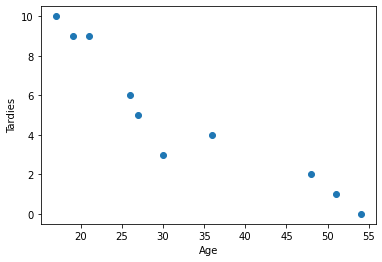

In [4]:
# Average matplot scatter 
plt.scatter(student_data['Age'],student_data['Tardies'])
plt.xlabel('Age')
plt.ylabel('Tardies');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 

# There is a clear lineal trend, the younger the students are they are more likely to be late

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
corr = np.corrcoef(student_data['Age'],student_data['Tardies'])
cov = np.cov(student_data['Age'],student_data['Tardies'])
print(corr)
print(cov)

# The correlation coeficient is really strong and negative, which means that the dependent variable will go down 
# when the independent variable increases
# The covariance coefficient is negative which means that for large X values (age), we will have small Y values (tardies)

[[ 1.         -0.93916269]
 [-0.93916269  1.        ]]
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.
slope, intercept, rvalue, pvalue, stderr = linregress(student_data['Age'],student_data['Tardies'])
# I'm using a linear regression due the strong correlation coefficient 

Plot your regression model on your scatter plot.

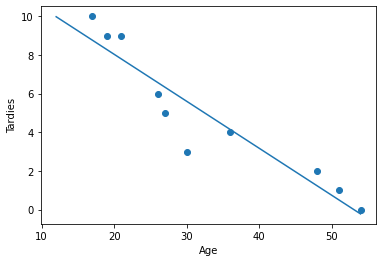

In [8]:
# Your code here.
ages = range(int(intercept),max(student_data['Age']+1))
tardies = [slope * age + intercept for age in ages]
plt.scatter(student_data['Age'],student_data['Tardies'])
plt.plot(ages,tardies)
plt.xlabel('Age')
plt.ylabel('Tardies');

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
# Your response here. 
# Given the strong r value and the small standard error, we can conclude that age actually influences 
# the posibility of a student being late

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [11]:
# Your response here. 
model = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
model.corr()
# Fuel Barrels/Year is the most important variable since fuel usage directly impacts CO2 emission
# Year seems to be the least important variable since there is no clear correlation 

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [16]:
# Your response here. 
# Definimos variables independientes
x_columns = model.drop('CO2 Emission Grams/Mile', axis = 1)
x = sm.add_constant(x_columns)
# Definimos variables dependientes
y = model['CO2 Emission Grams/Mile']
          
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [17]:
# Your response here. 

#
print_model = model.summary()
print(print_model) 
# R-squared is close to 1 which means that the model helps to make predictions 
# Pvalue or Prob(F-statistic) is cero which gives us more confidence on the model functionality to predict values

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                             20:24:27   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [18]:
# Your code here. 
bonus = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attendants': [1,2,4,4,5,7,8,13]})
bonus

,Invited,Attendants
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

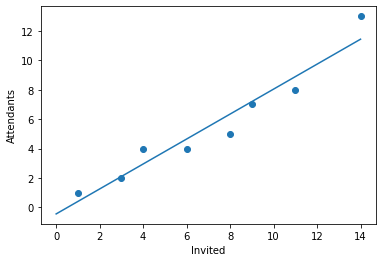

In [19]:
slope, intercept, rvalue, pvalue, stderr = linregress(bonus.Invited, bonus.Attendants)
invited = range(int(intercept),max(bonus.Invited)+1)
attendant = [slope * i + intercept for i in invited]
plt.scatter(bonus.Invited, bonus.Attendants)
plt.plot(invited, attendant)
plt.xlabel('Invited')
plt.ylabel('Attendants');

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [20]:
# Your response here. 
print(f'Slope: {slope}, Intercept: {intercept}, R Value: {rvalue}, P Value: {pvalue}, Std Error: {stderr}')
print('There is a strong positive correlation which actually means that the more invited people there are, the more attends which rejects the theory that the more people is invited, the more people is missing ')

Slope: 0.8484848484848485, Intercept: -0.43939393939393945, R Value: 0.9652303546573691, P Value: 0.00010236374464090686, Std Error: 0.09380896778286217
There is a strong positive correlation which actually means that the more invited people there are, the more attends which rejects the theory that the more people is invited, the more people is missing 


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

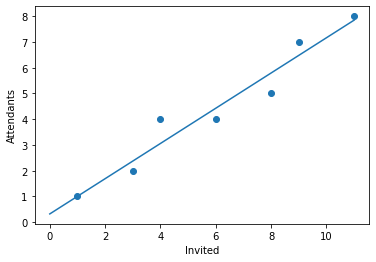

In [21]:
# Your response here. 
bonus2 = bonus.drop(7,axis=0)
slope, intercept, rvalue, pvalue, stderr = linregress(bonus2.Invited, bonus2.Attendants)
invited = range(int(intercept),max(bonus2.Invited)+1)
attendant = [slope * i + intercept for i in invited]
plt.scatter(bonus2.Invited, bonus2.Attendants)
plt.plot(invited, attendant)
plt.xlabel('Invited')
plt.ylabel('Attendants');

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [22]:
# Your response here. 
print(f'Slope: {slope}, Intercept: {intercept}, R Value: {rvalue}, P Value: {pvalue}, Std Error: {stderr}')
# The model seems now to be fitted better since the regression line is now more symemtrical
# However it did not changed dramatically since the outlier was not that far away from the other data points

Slope: 0.6842105263157895, Intercept: 0.32330827067669166, R Value: 0.971278116825086, P Value: 0.0002644056885656864, Std Error: 0.07496206665031292
